In [2]:
!pip install kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.14-py3-none-any.whl size=105119 sha256=2f30712d33a219be6d93d3375ca749610645af19b8c3bd0da7a384a216ec3435
  Stored in directory: /home/sagemaker-user/.cache/pip/wheels/d7/54/06/8a8f40cb39536605feb9acaacd0237a95eba39e5065e6392f4
Successfully built kaggle


In [3]:
!pip show kaggle

Name: kaggle
Version: 1.6.14
Summary: Kaggle API
Home-page: https://github.com/Kaggle/kaggle-api
Author: Kaggle
Author-email: support@kaggle.com
License: Apache 2.0
Location: /opt/conda/lib/python3.10/site-packages
Requires: bleach, certifi, python-dateutil, python-slugify, requests, six, tqdm, urllib3
Required-by: 


In [37]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/home/sagemaker-user/.kaggle’: File exists


In [38]:
!touch ~/.kaggle/kaggle.json

In [39]:
cd ~/.kaggle

/home/sagemaker-user/.kaggle


In [40]:
ls

kaggle.json


In [52]:
import os
import json

# Define the path for the kaggle.json file
kaggle_path = os.path.expanduser('~/.kaggle')
kaggle_file = os.path.join(kaggle_path, 'kaggle.json')

# Ensure the .kaggle directory exists
os.makedirs(kaggle_path, exist_ok=True)

# Define your API token (replace with your actual username and key)
api_token={"username":"username","key":"key"}

# Write the API token to the kaggle.json file
with open(kaggle_file, 'w') as file:
    json.dump(api_token, file)

print(f"kaggle.json file has been created at {kaggle_file}")


kaggle.json file has been created at /home/sagemaker-user/.kaggle/kaggle.json


In [55]:
!chmod 600 /home/sagemaker-user/.kaggle/kaggle.json

In [56]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia --force

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
100%|█████████████████████████████████████▉| 2.29G/2.29G [02:21<00:00, 15.2MB/s]
100%|██████████████████████████████████████| 2.29G/2.29G [02:21<00:00, 17.4MB/s]


In [66]:
import zipfile
with zipfile.ZipFile('/home/chest-xray-pneumonia.zip','r') as zip_ref:
    zip_ref.extractall('./data')

In [1]:
ls

MedicalAI.ipynb  chest-xray-pneumonia.zip  data/


In [1]:
import glob
import random
import matplotlib.pyplot as plt

def get_random_image(dir,condition):
    if condition=='n':
        placeholder="NORMAL"
    elif condition=='p':
        placeholder="PNEUMONIA"
    else:
        raise Exception('Sorry invalid condition')

    folder=f'./data/chest_xray/{dir}/{placeholder}/*.jpeg'
    image_paths=glob.glob(folder)
    max_length=len(image_paths)
    random_number=random.randint(0,max_length)

    for index,item in enumerate(image_paths,start=1):
        if index==random_number:
            print(index,item)
            image=plt.imread(item)
            print(image.shape)
            print(image)
            ready_image=plt.imshow(image, cmap='gray')
            return ready_image
    
    

255 ./data/chest_xray/test/PNEUMONIA/person1_virus_11.jpeg
(560, 872)
[[136 130 121 ... 162 184 201]
 [137 131 123 ... 193 188 185]
 [136 131 123 ... 187 196 203]
 ...
 [ 12  11  12 ...  23  21  24]
 [ 11  11  12 ...  23  21  24]
 [ 11  11  12 ...  23  21  24]]


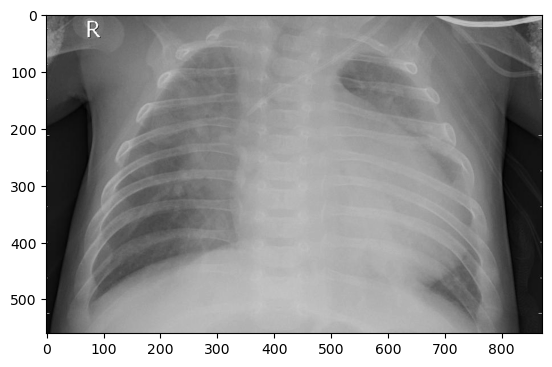

In [2]:
get_random_image('test','p')

654 ./data/chest_xray/train/PNEUMONIA/person1320_bacteria_3355.jpeg
(944, 1608)
[[16 16 16 ... 76 76 76]
 [16 16 16 ... 75 75 75]
 [16 16 16 ... 74 74 74]
 ...
 [18 18 18 ... 48 48 48]
 [18 18 18 ... 48 48 48]
 [18 18 18 ... 48 48 48]]


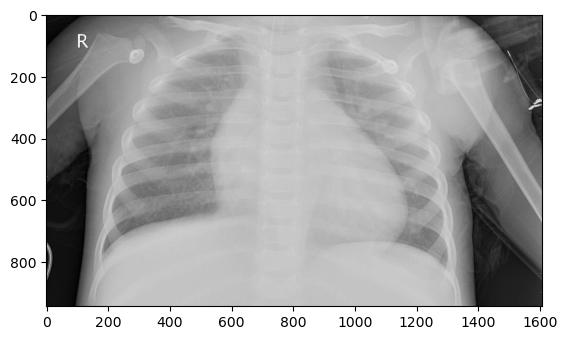

In [3]:
get_random_image('train','p')

204 ./data/chest_xray/test/NORMAL/NORMAL2-IM-0341-0001.jpeg
(1319, 1670)
[[56 57 57 ... 73 71 71]
 [54 56 56 ... 76 74 73]
 [52 54 56 ... 80 77 75]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


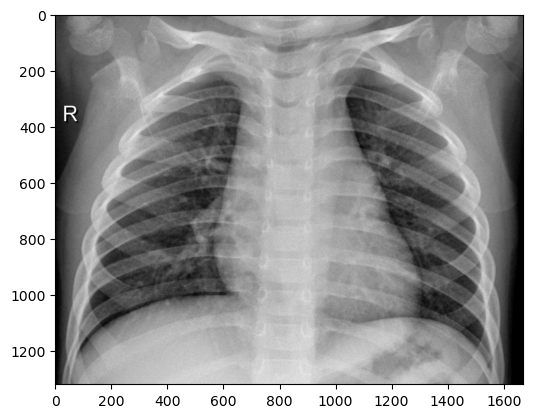

In [4]:
get_random_image('test','n')

In [5]:
import glob
import matplotlib.pyplot as plt
from PIL import Image

folder='./data/chest_xray/train/*/*.jpeg'

pneumonia_count=0
normal_count=0

image_path=glob.glob(folder)

for img_path in image_path:
    if "person" in img_path:
        full_size_image=Image.open(img_path)
        resized_image=full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/train'+'/train_pneumonia'+str(pneumonia_count)+'.jpeg',arr=resized_image,format='jpeg',cmap='gray')
        pneumonia_count+=1
    else:
        full_size_image=Image.open(img_path)
        resized_image=full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/train'+'/train_normal'+str(normal_count)+'.jpeg',arr=resized_image,format='jpeg',cmap='gray')
        normal_count+=1

In [6]:
import glob
import matplotlib.pyplot as plt
from PIL import Image

folder='./data/chest_xray/test/*/*.jpeg'

pneumonia_count=0
normal_count=0

image_path=glob.glob(folder)

for img_path in image_path:
    if "person" in img_path:
        full_size_image=Image.open(img_path)
        resized_image=full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/test'+'/test_pneumonia'+str(pneumonia_count)+'.jpeg',arr=resized_image,format='jpeg',cmap='gray')
        pneumonia_count+=1
    else:
        full_size_image=Image.open(img_path)
        resized_image=full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/test'+'/test_normal'+str(normal_count)+'.jpeg',arr=resized_image,format='jpeg',cmap='gray')
        normal_count+=1

In [7]:
import glob
import matplotlib.pyplot as plt
from PIL import Image

folder='./data/chest_xray/val/*/*.jpeg'

pneumonia_count=0
normal_count=0

image_path=glob.glob(folder)

for img_path in image_path:
    if "person" in img_path:
        full_size_image=Image.open(img_path)
        resized_image=full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/val'+'/val_pneumonia'+str(pneumonia_count)+'.jpeg',arr=resized_image,format='jpeg',cmap='gray')
        pneumonia_count+=1
    else:
        full_size_image=Image.open(img_path)
        resized_image=full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/val'+'/val_normal'+str(normal_count)+'.jpeg',arr=resized_image,format='jpeg',cmap='gray')
        normal_count+=1

(224, 224, 3)


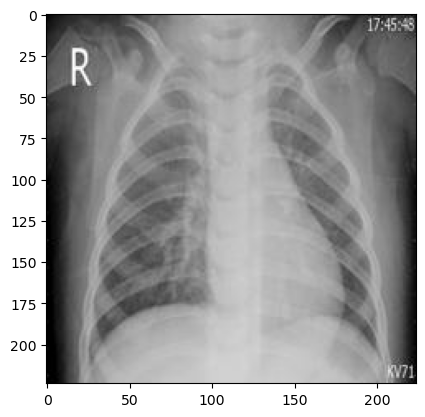

In [9]:
import matplotlib.pyplot as plt

image=plt.imread('data/chest_xray/train/train_pneumonia979.jpeg')
print(image.shape)
ready_image=plt.imshow(image, cmap='gray')

In [8]:
import glob
import pandas as pd

folder='./data/chest_xray/*/*.jpeg'

category=[]
condition_of_lung=[]
file_names=[]

all_files=glob.glob(folder)

for file_name in all_files:
    if 'train' in file_name:
        if'pneumonia' in file_name:
            category.append('train')
            file_names.append(file_name)
            condition_of_lung.append('pneumonia')
        elif 'normal' in file_name:
            category.append('train')
            file_names.append(file_name)
            condition_of_lung.append('normal')
    elif 'test' in file_name:
        if'pneumonia' in file_name:
            category.append('test')
            file_names.append(file_name)
            condition_of_lung.append('pneumonia')
        elif 'normal' in file_name:
            category.append('test')
            file_names.append(file_name)
            condition_of_lung.append('normal')
    if 'val' in file_name:
        if'pneumonia' in file_name:
            category.append('val')
            file_names.append(file_name)
            condition_of_lung.append('pneumonia')
        elif 'normal' in file_name:
            category.append('val')
            file_names.append(file_name)
            condition_of_lung.append('normal')
            
all_data_df=pd.DataFrame({'dataset type':category,"x-ray result":condition_of_lung,'filename':file_names})

In [9]:
all_data_df

,dataset type,x-ray result,filename
0,test,normal,./data/chest_xray/test/test_normal0.jpeg
1,test,normal,./data/chest_xray/test/test_normal1.jpeg
2,test,normal,./data/chest_xray/test/test_normal2.jpeg
3,test,normal,./data/chest_xray/test/test_normal3.jpeg
4,test,normal,./data/chest_xray/test/test_normal4.jpeg
...,...,...,...
5851,val,pneumonia,./data/chest_xray/val/val_pneumonia3.jpeg
5852,val,pneumonia,./data/chest_xray/val/val_pneumonia4.jpeg
5853,val,pneumonia,./data/chest_xray/val/val_pneumonia5.jpeg
5854,val,pneumonia,./data/chest_xray/val/val_pneumonia6.jpeg


234.0
390.0
1341.0
3875.0
8.0
8.0


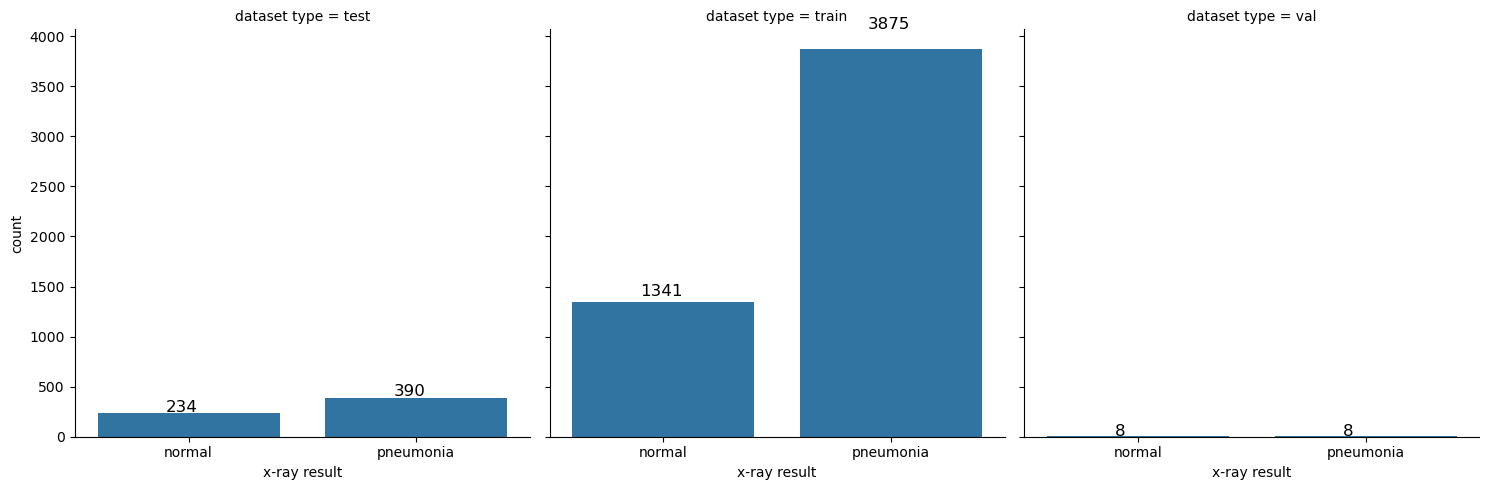

In [25]:
import seaborn as sns
g=sns.catplot(data=all_data_df,x='x-ray result',col='dataset type',kind='count')

for i in range(0, 3):
    ax = g.facet_axis(0, i)
    for p in ax.patches:
        print(p.get_height())
        ax.text(p.get_x() + 0.3,
                p.get_height() * 1.05,
                '{:0.0f}'.format(p.get_height()),
                color='black',
                rotation='horizontal',
                size='large')

In [12]:
import glob
import os
import pandas as pd

train_folder='./data/chest_xray/train/*.jpeg'
train_df_lst=pd.DataFrame(columns=['labels','s3_path'],dtype='object')
train_images_path=glob.glob(train_folder)

counter=0
class_arg=''

for i in train_images_path:
    if 'pneumonia' in i:
        class_arg=1
    else:
        class_arg=0
    train_df_lst.loc[counter]=[class_arg,os.path.basename(i)]
    counter+=1

In [13]:
train_df_lst

,labels,s3_path
0,0,train_normal0.jpeg
1,0,train_normal1.jpeg
2,0,train_normal2.jpeg
3,0,train_normal3.jpeg
4,0,train_normal4.jpeg
...,...,...
5211,1,train_pneumonia3870.jpeg
5212,1,train_pneumonia3871.jpeg
5213,1,train_pneumonia3872.jpeg
5214,1,train_pneumonia3873.jpeg


In [16]:
import glob
import os
import pandas as pd

test_folder='./data/chest_xray/test/*.jpeg'
test_df_lst=pd.DataFrame(columns=['labels','s3_path'],dtype='object')
test_images_path=glob.glob(test_folder)

counter=0
class_arg=''

for i in test_images_path:
    if 'pneumonia' in i:
        class_arg=1
    else:
        class_arg=0
    test_df_lst.loc[counter]=[class_arg,os.path.basename(i)]
    counter+=1

In [17]:
test_df_lst

,labels,s3_path
0,0,test_normal0.jpeg
1,0,test_normal1.jpeg
2,0,test_normal2.jpeg
3,0,test_normal3.jpeg
4,0,test_normal4.jpeg
...,...,...
619,1,test_pneumonia385.jpeg
620,1,test_pneumonia386.jpeg
621,1,test_pneumonia387.jpeg
622,1,test_pneumonia388.jpeg


In [22]:
def save_to_lst(df,prefix):
    return df[['labels','s3_path']].to_csv(
        f'{prefix}.lst',sep='\t',index=True,header=False
    )

In [23]:
save_to_lst(train_df_lst,'train')

In [24]:
save_to_lst(test_df_lst,'test')

In [25]:
!pip install boto3

In [33]:
import boto3

s3=boto3.client('s3')

response=s3.create_bucket(
    Bucket='pneumonia-images-bucket-tkg',
    CreateBucketConfiguration={
        'LocationConstraint': 'ap-south-1',
    },
)

In [35]:
s3.upload_file('./test.lst', 'pneumonia-images-bucket-tkg', 'test.lst')

In [36]:
s3.upload_file('./train.lst', 'pneumonia-images-bucket-tkg', 'train.lst')

In [ ]:
!aws s3 sync  'data/chest_xray/train/' 's3://pneumonia-images-bucket-tkg/train/'

In [3]:
import sagemaker
from sagemaker import image_uris
import boto3
from sagemaker import get_execution_role

sess=sagemaker.Session()

algorithm_image=image_uris.retrieve(
    region=boto3.Session().region_name,
    framework='image-classification'
)

algorithm_image

'991648021394.dkr.ecr.ap-south-1.amazonaws.com/image-classification:1'

In [8]:
s3_bucket='pneumonia-images-bucket-tkg'
s3_output_location=f's3://{s3_bucket}/models/image_model'

In [11]:
role=get_execution_role()
role

'arn:aws:iam::767397975047:role/service-role/AmazonSageMaker-ExecutionRole-20240611T022211'

In [14]:
img_classifier_model=sagemaker.estimator.Estimator(
    algorithm_image,
    role=role,
    instance_count=1,
    instance_type='ml.p2.xlarge',
    volume_size=50,
    max_run=432000,
    input_mode='File',
    output_path=s3_output_location,
    sagemaker_session=sess
)

In [15]:
img_classifier_model

In [33]:
import glob

count = 0

for filepath in glob.glob('./data/chest_xray/train/*.jpeg'):
    count += 1
print(count)

0


In [46]:
img_classifier_model.set_hyperparameters(
    image_shape="3,224,224",
    num_classes=2,
    use_pretrained_model=1,
    num_training_samples=5216,
    augmentation_type='crop_color_transform',
    epochs=15,
    early_stopping=True,
    early_stopping_min_epochs=8,
    early_stopping_patience=5,
    early_stopping_tolerance=0.0,
    lr_scheduler_factor=0.1,
    lr_scheduler_step='8,10,12'
)

In [47]:
from sagemaker.tuner import CategoricalParameter, ContinuousParameter, HyperparameterTuner

hyperparameter_ranges={
    "learning_rate": ContinuousParameter(0.01, 0.1),
    "mini_batch_size": CategoricalParameter([8, 16, 32]),
    "optimizer": CategoricalParameter(["sgd", "adam"])
}


In [48]:
objective_metric_name="validation:accuracy"
objective_type="Maximize"
max_jobs=5
max_parallel_jobs=1

tuner=HyperparameterTuner(estimator=img_classifier_model,
                          objective_metric_name=objective_metric_name,
                          hyperparameter_ranges=hyperparameter_ranges,
                          objective_type=objective_type,
                          max_jobs=max_jobs,
                          max_parallel_jobs=max_parallel_jobs)

In [49]:

from sagemaker.session import TrainingInput

model_inputs={
    "train":sagemaker.inputs.TrainingInput(s3_data=f"s3://{s3_bucket}/train/",content_type="application/x-image"),
    "train_lst":sagemaker.inputs.TrainingInput(s3_data=f"s3://{s3_bucket}/train.lst",content_type="application/x-image"),
    "validation":sagemaker.inputs.TrainingInput(s3_data=f"s3://{s3_bucket}/test/",content_type="application/x-image"),
    "validation_lst":sagemaker.inputs.TrainingInput(s3_data=f"s3://{s3_bucket}/test.lst",content_type="application/x-image")
}

In [65]:
import time
job_name_prefix="img-tune"
timestamp=time.strftime("%Y-%m-%d-%H-%M-%S",time.gmtime())
job_name=job_name_prefix+timestamp

In [66]:
job_name

'img-tune2024-07-21-06-35-58'

In [ ]:
tuner.fit(inputs=model_inputs,job_name=job_name,logs=True)

No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config


...............................................................................................................................................................................................................................................................................................................................................

In [1]:
import sagemaker
from sagemaker import get_execution_role

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml


In [2]:
role=get_execution_role()

In [4]:
model=sagemaker.model.Model(
    image_uri=algorithm_image,
    model_data='s3://pneumonia-images-bucket-tkg/models/image_model/img-tune2024-07-21-06-35-58-004-66c7f4bf/output/model.tar.gz',
    role=role
)

In [6]:
endpoint_name="Demo-image-classifier-pneumonia-tkg"

deployment=model.deploy(
    initial_instance_count=1,
    instance_type='ml.m4.xlarge',
    endpoint_name=endpoint_name
)

--------------!

In [8]:
from sagemaker.predictor import Predictor
predictor=Predictor('Demo-image-classifier-pneumonia-tkg')

In [18]:
from sagemaker.serializers import IdentitySerializer
import base64

file_name="data/chest_xray/val/val_normal1.jpeg"

predictor.serializer=IdentitySerializer("Image/jpeg")
with open(file_name,'rb')as f:
    payload=f.read()

inference=predictor.predict(data=payload)
inference


b'[1.0, 2.6270081419986317e-14]'

In [10]:
import glob
import json
import numpy as np

file_path='data/chest_xray/val/*.jpeg'
files=glob.glob(file_path)

y_true=[]
y_pred=[]

def make_pred():
    for file in files:
        if 'normal' in file:
            with open(file,'rb') as f:
                payload=f.read()
                inference=predictor.predict(data=payload).decode('utf-8')
                result=json.loads(inference)
                predicted_class=np.argmax(result)
                y_true.append(0)
                y_pred.append(predicted_class)
        elif 'pneumonia' in file:
            with open(file,'rb') as f:
                payload=f.read()
                inference=predictor.predict(data=payload).decode('utf-8')
                result=json.loads(inference)
                predicted_class=np.argmax(result)
                y_true.append(1)
                y_pred.append(predicted_class)
     

In [11]:
make_pred()

In [12]:
y_true

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]

In [13]:
y_pred

[1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf=confusion_matrix(y_true,y_pred)

In [15]:
cf

array([[3, 5],
       [0, 8]])

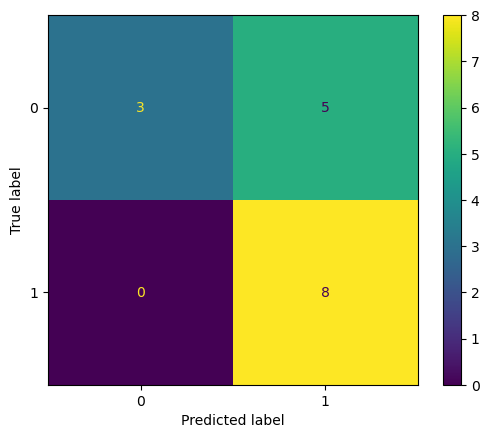

In [16]:
ConfusionMatrixDisplay(confusion_matrix=cf,display_labels=[0,1]).plot()

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.38      0.55         8
           1       0.62      1.00      0.76         8

    accuracy                           0.69        16
   macro avg       0.81      0.69      0.65        16
weighted avg       0.81      0.69      0.65        16

